<a href="https://colab.research.google.com/github/megboes/groves-research/blob/main/groves_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

max_num_boxes=3

In [2]:
T1 = np.array([[math.sqrt(3)+3, math.sqrt(3)-3, -2*math.sqrt(3)],
              [math.sqrt(3)-3, math.sqrt(3)+3, -2*math.sqrt(3)]])
T = (1/6)*T1

pi_0=[[]]
pi_1=[[[0,0,0]]]
pi_2=[[[0,0,0],[0,0,1]],[[0,0,0],[0,1,0]],[[0,0,0],[1,0,0]]]
master_pi=[pi_0,pi_1,pi_2]

In [3]:
def check_if_box_should_be_added(box, partition):
  we_should_add=True
  a,b,c=box
  if box in partition:
    we_should_add=False
  if (a>=1)and([a-1,b,c] in partition)==False:
    we_should_add=False
  if (b>=1)and([a,b-1,c] in partition)==False:
    we_should_add=False
  if (c>=1)and([a,b,c-1] in partition)==False:
    we_should_add=False
  return(we_should_add)

def given_single_partitions_produces_list_of_bigger_partitions(given_partition):
  some_partitions_of_more_boxes = []
  for element in given_partition:
    a,b,c=element
    candidate=[a+1,b,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b+1,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b,c+1]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)
  return(some_partitions_of_more_boxes)

def deletes_duplicates(collection_of_partitions):
  trial=collection_of_partitions
  for element in trial:
   number=trial.count(element)
   while number >=2:
     trial.remove(element)
     number=trial.count(element)
  collection_of_partitions=trial
  return(collection_of_partitions)

In [4]:
def given_partition_determines_height(partition):
  #find size of space needed for grove
  height=0
  for box in partition:
    a,b,c=box
    height = max(height, a+b+c)
  height+=2
  return(height)

In [5]:
def generates_bigger_master_pi(master_pi):

################################### next block generates paritions up to max_num_boxes #################################3
#yeah, this should be it's own function
  for i in range(2,max_num_boxes):
    for part in master_pi[i]:
        if len(master_pi)==i+1:
          master_pi.append(given_single_partitions_produces_list_of_bigger_partitions(part))
        elif len(master_pi)==i+2:
          master_pi[i+1]+=given_single_partitions_produces_list_of_bigger_partitions(part)
        else: print('something went wrong')
    for part in master_pi[i+1]:
      part.sort()
      master_pi[i+1].sort()
    master_pi[i+1] = deletes_duplicates(master_pi[i+1])
  return(master_pi)
################ paritions up to max_num_boxes, i.e. MASTER_PI complete ###########################3


In [6]:
def adds_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='cyan', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

def adds_green_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='green', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


In [7]:
master_pi=generates_bigger_master_pi(master_pi)

In [8]:
#prints image of each partition
def prints_image_of_partition(partition, fig, ax):
  for box in partition:
    a,b,c = box
    if [a,b,c+1] not in partition:
      adds_segment_from_3(a,b,c+1,a,b+1,c+1)
      adds_segment_from_3(a,b,c+1,a+1,b,c+1)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
    if [a,b+1,c] not in partition:
      adds_segment_from_3(a,b+1,c,a,b+1,c+1)
      adds_segment_from_3(a,b+1,c,a+1,b+1,c)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b+1,c,a+1,b+1,c+1)
    if [a+1,b,c] not in partition:
      adds_segment_from_3(a+1,b,c,a+1,b,c+1)
      adds_segment_from_3(a+1,b,c,a+1,b+1,c)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b+1,c,a+1,b+1,c+1)
  return(fig,ax)

In [9]:
def given_partition_and_height_determines_initial_conditions(partition, height):
  #set everything in the space to 0
  initial_conditions = []

  for i in range(height):
    initial_conditions.append([])
    for j in range(height):
      initial_conditions[i].append([])
      for k in range(height):
        initial_conditions[i][j].append(0)
  # so now all coordinats have value of 0

  # here we make some coordinates equal to 1
  for box in partition:
    a,b,c=box
    if [a,b,c+1] not in partition:
      initial_conditions[a][b][c+1]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a,b+1,c] not in partition:
      initial_conditions[a][b+1][c]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a+1,b,c] not in partition:
      initial_conditions[a+1][b][c]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    #mission complete!
  return(initial_conditions)




In [10]:
def given_initial_conditions_and_height_determines_grove_poly(conditions, height):
  cg=conditions
  #add in a, b, c variables
  a=[]
  for j in range(height):
    a.append([])
    for k in range(height):
      a[j].append(sp.symbols('a'+str(j)+str(k)))
  b=[]
  for i in range(height):
    b.append([])
    for k in range(height):
      b[i].append(sp.symbols('b'+str(i)+str(k)))
  c=[]
  for i in range(height):
    c.append([])
    for j in range(height):
      c[i].append(sp.symbols('c'+str(i)+str(j)))

  while cg[0][0][0]==0:
    for i in range(height-1):
      for j in range(height-1):
        for k in range(height-1):
          if (cg[i][j][k]==0) and (cg[i+1][j][k]!=0) and (cg[i][j+1][k]!=0) and (cg[i][j][k+1]!=0):
            cg[i][j][k]=(b[i][k]*c[i][j]*cg[i+1][j][k]*cg[i][j+1][k+1]+c[i][j]*a[j][k]*cg[i][j+1][k]*cg[i+1][j][k+1]+a[j][k]*b[i][k]*cg[i][j][k+1]*cg[i+1][j+1][k])/cg[i+1][j+1][k+1]
  poly=sp.expand(cg[0][0][0])
  #print(poly)
  return(poly)

In [11]:
def given_partition_prints_grove(pi):
  tall = given_partition_determines_height(pi)
  g = given_partition_and_height_determines_initial_conditions(pi, tall)
  f=given_initial_conditions_and_height_determines_grove_poly(g, tall)
  print(f)
  return(f)

In [12]:
#see if we can get this one to take in a partition, and returna list of monomials

def takes_partition_returns_list_of_monomials(pi):
  poly =given_partition_prints_grove(pi)
  monomials=poly.as_ordered_terms()
  # for monomial in monomials:
  #   print(monomial)
  # print(monomials)
  return(monomials)

In [13]:
#see if we can take a partition and a particular monomial, and then print a grove
def takes_monomial_and_partition_returns_grove_image(mono,pi,fig,ax):
  for l in range(len(str(mono))):
    if l % 4 == 1:
      if str(mono)[l-1] == 'a':
        x=0
        y=int(str(mono)[l])
        z=int(str(mono)[l+1])
        test = False
        if([x,y,z] not in pi):
          print("SOMETHING IS Wrong!!!")
        while test == False:
          if ([x,y,z] in pi) and ([x+1,y,z] not in pi):
            test = True
          elif ([x,y,z] in pi) and ([x+1,y,z] in pi):
            x+=1
        adds_green_segment_from_3(x+1,y,z+1,x+1,y+1,z)
        #######################################################################
      if str(mono)[l-1] == 'b':
        x=int(str(mono)[l])
        y=0
        z=int(str(mono)[l+1])
        test=False
        if([x,y,z] not in pi):
          print("THIS SIME THING IS BAD!!!")
        while test == False:
          if([x,y,z] in pi) and ([x,y+1,z] not in pi):
            test = True
          elif ([x,y,z] in pi) and ([x,y+1,z] in pi):
            y+=1
        adds_green_segment_from_3(x,y+1,z+1,x+1,y+1,z)
        ###########################################################3#############
      if str(mono)[l-1] == 'c':
        x=int(str(mono)[l])
        y=int(str(mono)[l+1])
        z=0
        test=False
        if ([x,y,z] not in pi):
          print("whoops-a-daisy")
        while test == False:
          if ([x,y,z] in pi) and ([x,y,z+1] not in pi):
            test = True
          elif([x,y,z] in pi) and ([x,y,z+1] in pi):
            z+=1
        adds_green_segment_from_3(x,y+1,z+1,x+1,y,z+1)
  return(fig,ax)

For the partition [[0, 0, 0]] we have the polynomial: 
a00*b00 + a00*c00 + b00*c00
which gives us the the monomials/groves:
a00*b00


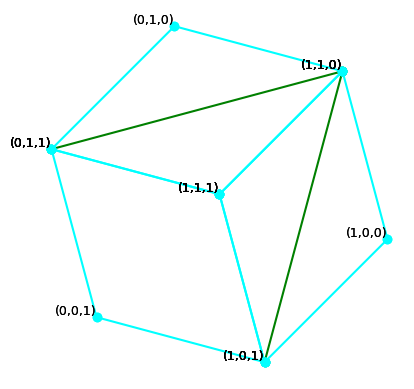

________________________________________
a00*c00


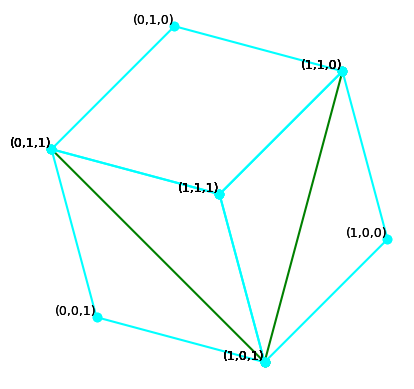

________________________________________
b00*c00


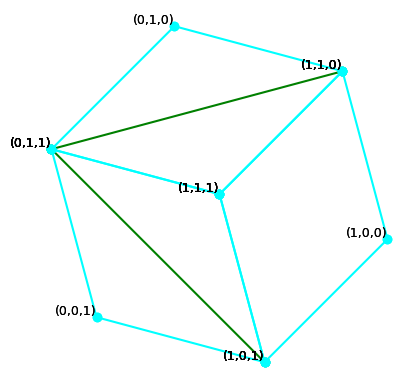

________________________________________
For the partition [[0, 0, 0], [0, 0, 1]] we have the polynomial: 
a00*a01*b00*b01 + a00*a01*b00*c00 + a00*b00*b01*c00 + a00*c00 + b00*c00
which gives us the the monomials/groves:
a00*a01*b00*b01


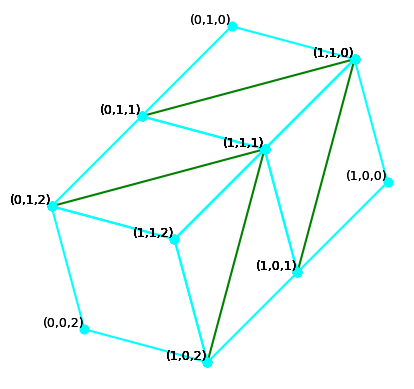

________________________________________
a00*a01*b00*c00


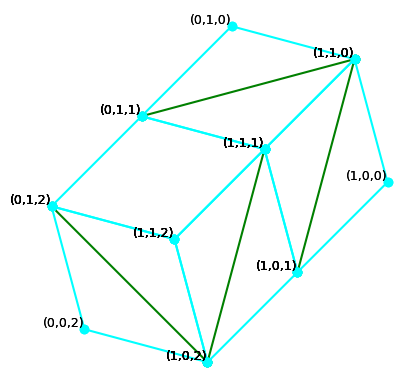

________________________________________
a00*b00*b01*c00


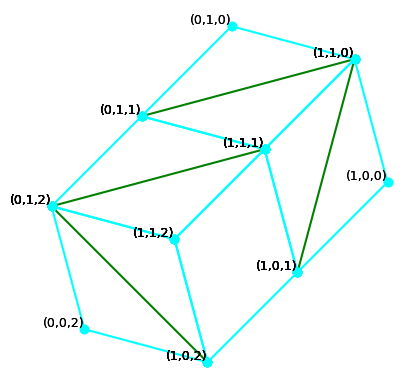

________________________________________
a00*c00


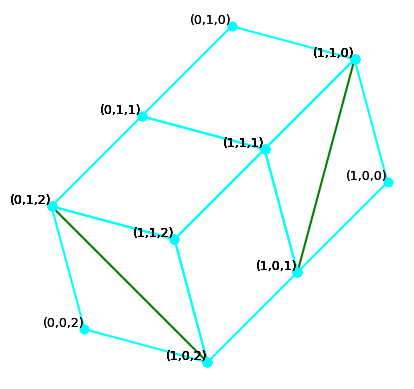

________________________________________
b00*c00


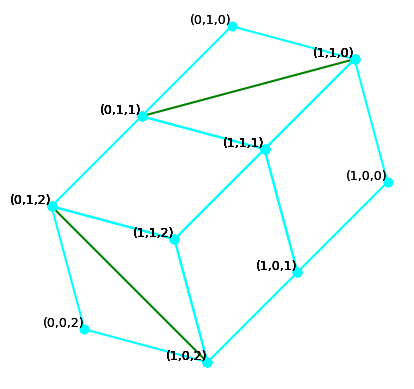

________________________________________
For the partition [[0, 0, 0], [0, 1, 0]] we have the polynomial: 
a00*a10*b00*c00 + a00*a10*c00*c01 + a00*b00*c00*c01 + a00*b00 + b00*c00
which gives us the the monomials/groves:
a00*a10*b00*c00


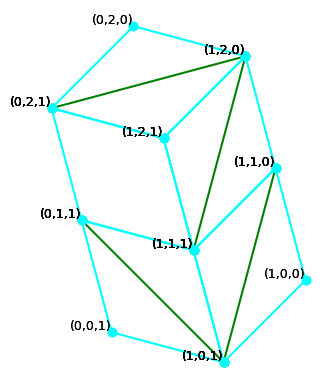

________________________________________
a00*a10*c00*c01


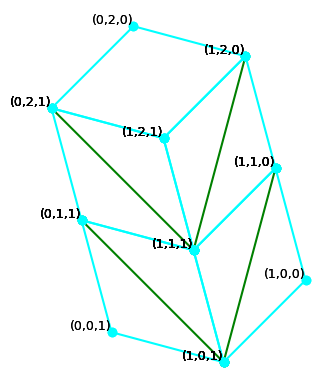

________________________________________
a00*b00*c00*c01


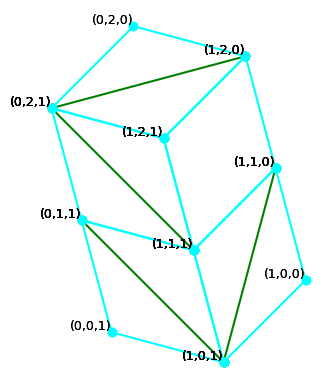

________________________________________
a00*b00


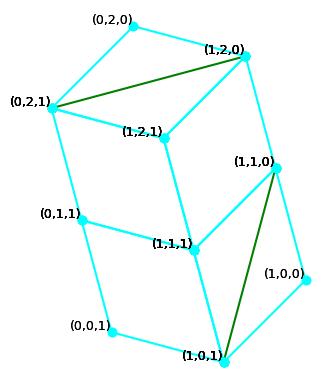

________________________________________
b00*c00


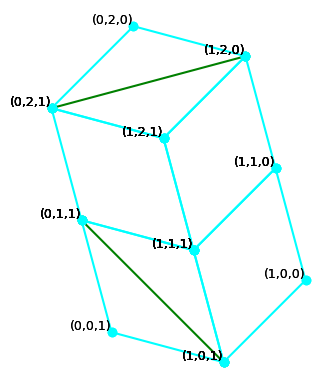

________________________________________
For the partition [[0, 0, 0], [1, 0, 0]] we have the polynomial: 
a00*b00*b10*c00 + a00*b00*c00*c10 + a00*b00 + a00*c00 + b00*b10*c00*c10
which gives us the the monomials/groves:
a00*b00*b10*c00


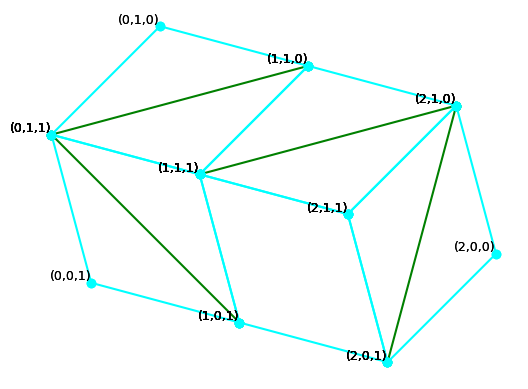

________________________________________
a00*b00*c00*c10


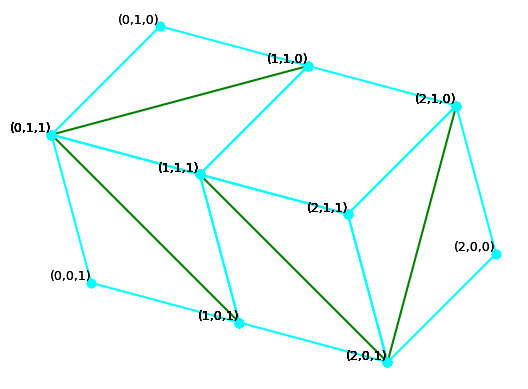

________________________________________
a00*b00


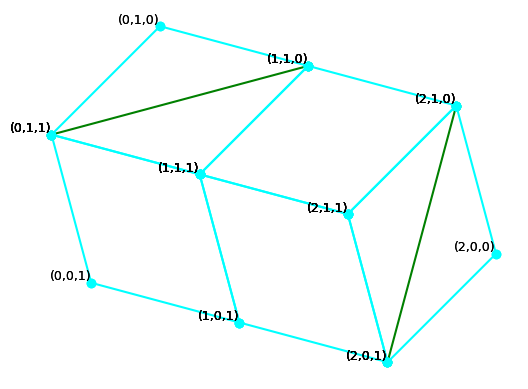

________________________________________
a00*c00


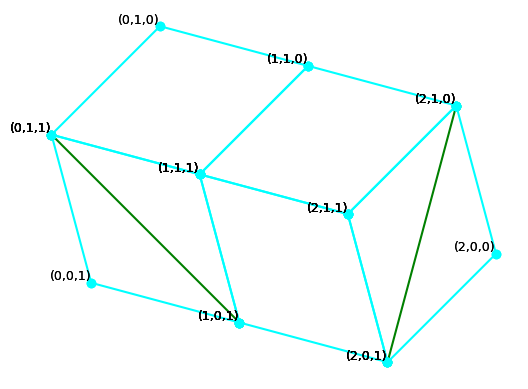

________________________________________
b00*b10*c00*c10


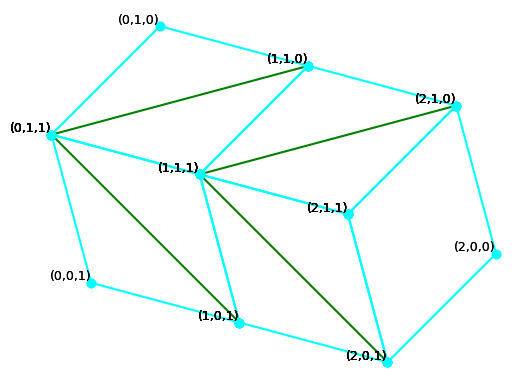

________________________________________
For the partition [[0, 0, 0], [0, 0, 1], [0, 0, 2]] we have the polynomial: 
a00*a01*a02*b00*b01*b02 + a00*a01*a02*b00*b01*c00 + a00*a01*b00*b01*b02*c00 + a00*a01*b00*c00 + a00*b00*b01*c00 + a00*c00 + b00*c00
which gives us the the monomials/groves:
a00*a01*a02*b00*b01*b02


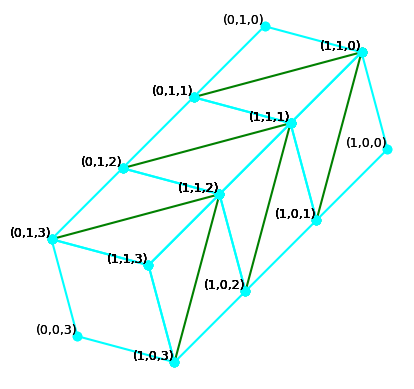

________________________________________
a00*a01*a02*b00*b01*c00


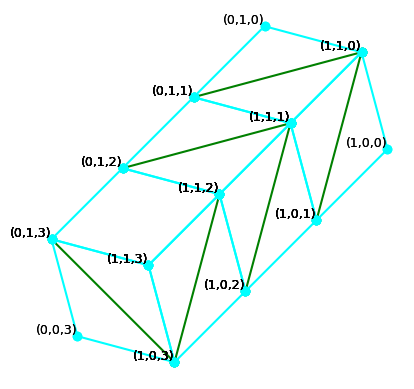

________________________________________
a00*a01*b00*b01*b02*c00


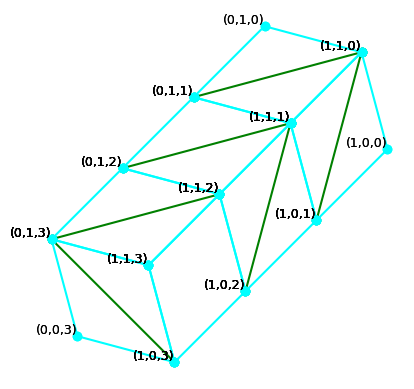

________________________________________
a00*a01*b00*c00


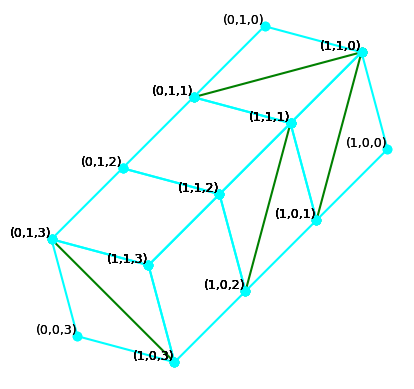

________________________________________
a00*b00*b01*c00


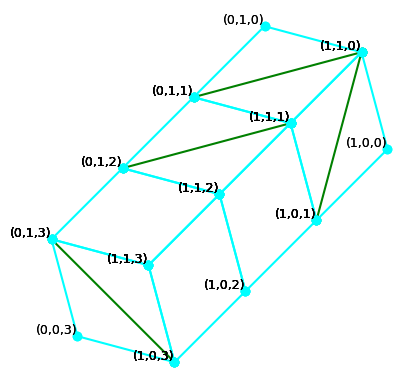

________________________________________
a00*c00


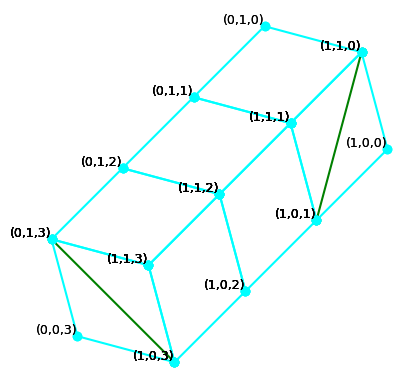

________________________________________
b00*c00


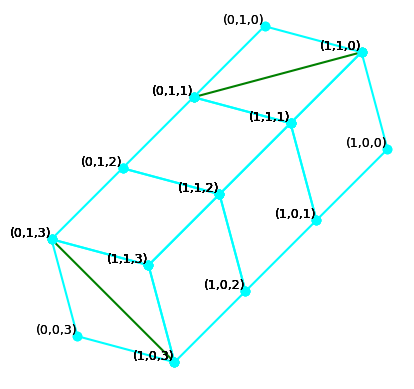

________________________________________
For the partition [[0, 0, 0], [0, 0, 1], [0, 1, 0]] we have the polynomial: 
a00*a01*b00*b01 + a00*a01*b00*c00 + a00*a10*b00*c00 + a00*a10*c00*c01 + a00*b00*b01*c00 + a00*b00*c00*c01 + b00*c00
which gives us the the monomials/groves:
a00*a01*b00*b01


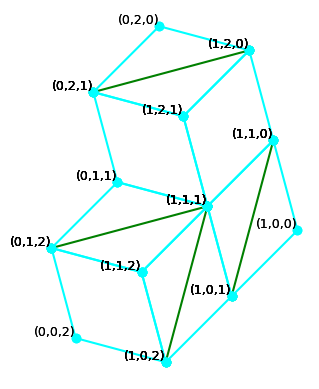

________________________________________
a00*a01*b00*c00


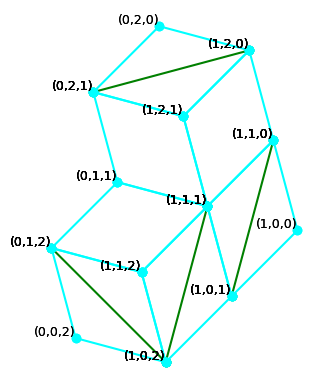

________________________________________
a00*a10*b00*c00


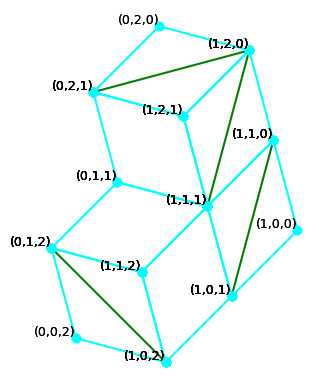

________________________________________
a00*a10*c00*c01


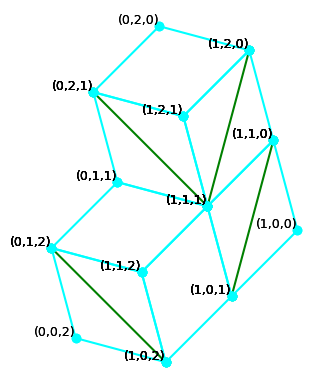

________________________________________
a00*b00*b01*c00


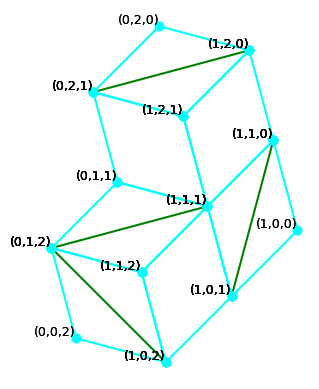

________________________________________
a00*b00*c00*c01


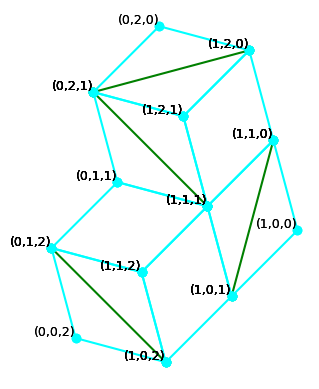

________________________________________
b00*c00


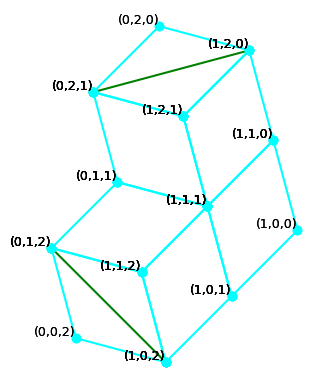

________________________________________
For the partition [[0, 0, 0], [0, 0, 1], [1, 0, 0]] we have the polynomial: 
a00*a01*b00*b01 + a00*a01*b00*c00 + a00*b00*b01*c00 + a00*b00*b10*c00 + a00*b00*c00*c10 + a00*c00 + b00*b10*c00*c10
which gives us the the monomials/groves:
a00*a01*b00*b01


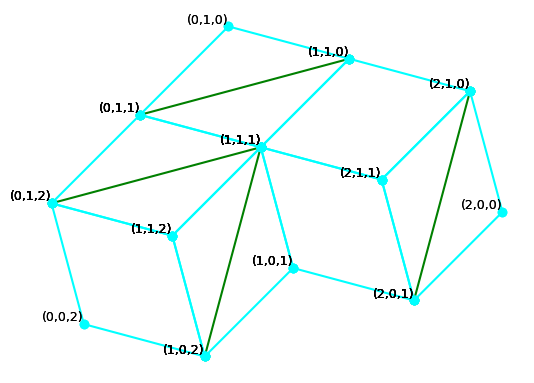

________________________________________
a00*a01*b00*c00


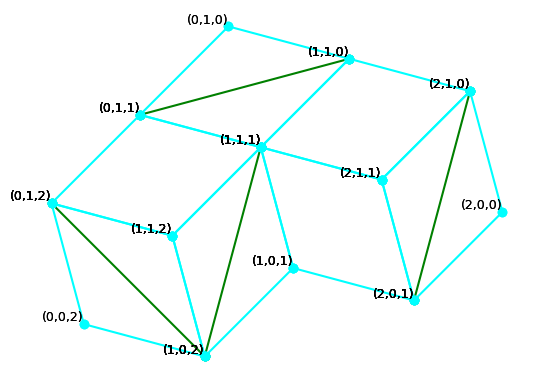

________________________________________
a00*b00*b01*c00


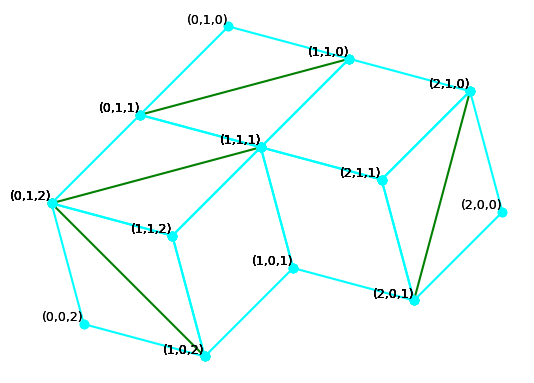

________________________________________
a00*b00*b10*c00


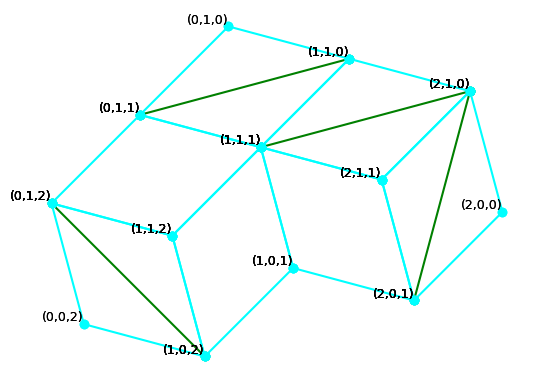

________________________________________
a00*b00*c00*c10


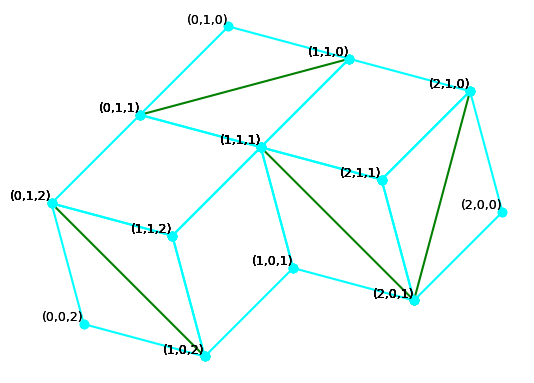

________________________________________
a00*c00


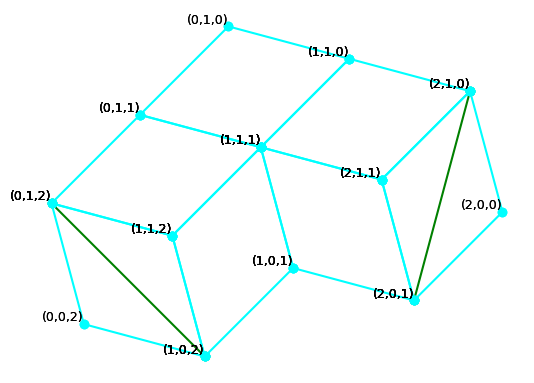

________________________________________
b00*b10*c00*c10


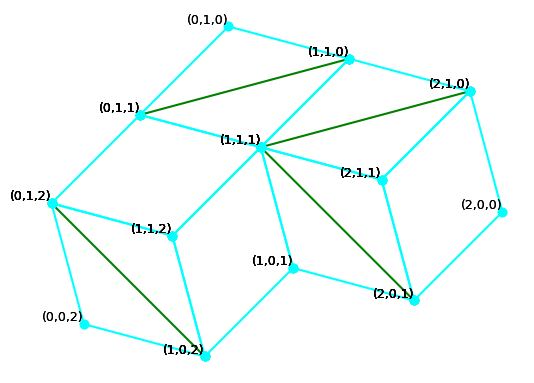

________________________________________
For the partition [[0, 0, 0], [0, 1, 0], [0, 2, 0]] we have the polynomial: 
a00*a10*a20*b00*c00*c01 + a00*a10*a20*c00*c01*c02 + a00*a10*b00*c00*c01*c02 + a00*a10*b00*c00 + a00*b00*c00*c01 + a00*b00 + b00*c00
which gives us the the monomials/groves:
a00*a10*a20*b00*c00*c01


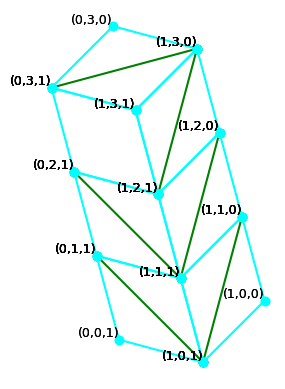

________________________________________
a00*a10*a20*c00*c01*c02


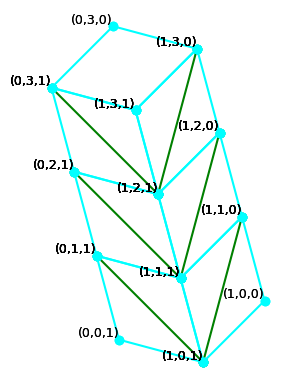

________________________________________
a00*a10*b00*c00*c01*c02


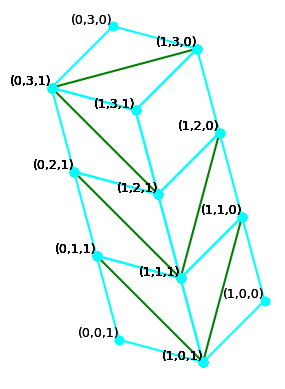

________________________________________
a00*a10*b00*c00


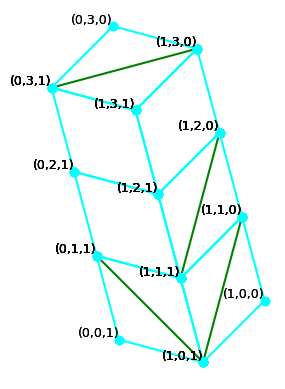

________________________________________
a00*b00*c00*c01


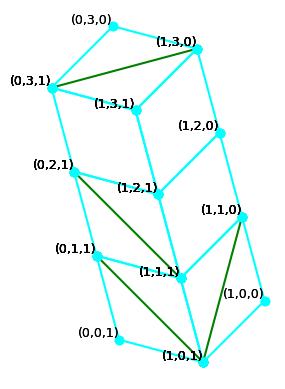

________________________________________
a00*b00


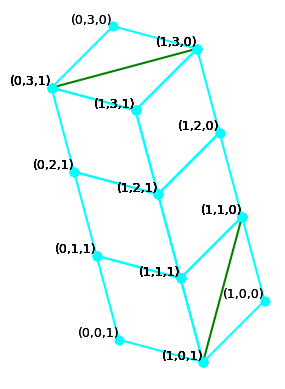

________________________________________
b00*c00


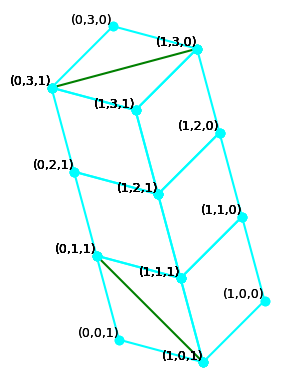

________________________________________
For the partition [[0, 0, 0], [0, 1, 0], [1, 0, 0]] we have the polynomial: 
a00*a10*b00*c00 + a00*a10*c00*c01 + a00*b00*b10*c00 + a00*b00*c00*c01 + a00*b00*c00*c10 + a00*b00 + b00*b10*c00*c10
which gives us the the monomials/groves:
a00*a10*b00*c00


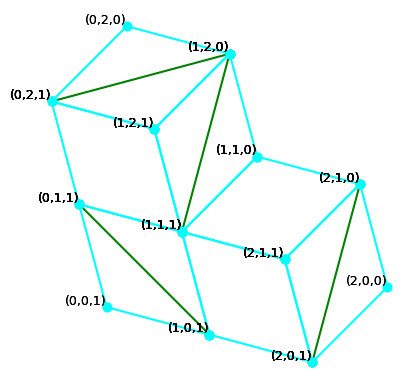

________________________________________
a00*a10*c00*c01


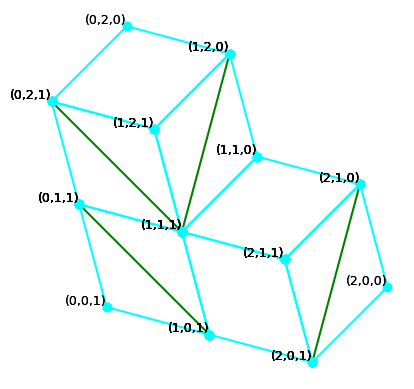

________________________________________
a00*b00*b10*c00


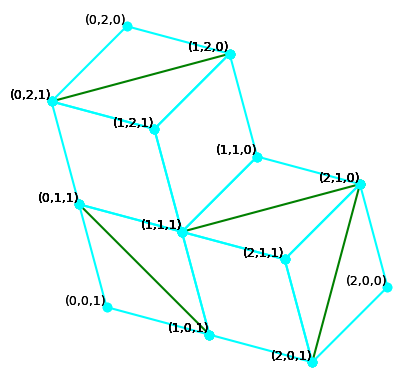

________________________________________
a00*b00*c00*c01


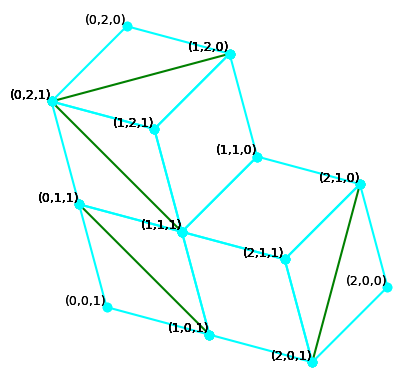

________________________________________
a00*b00*c00*c10


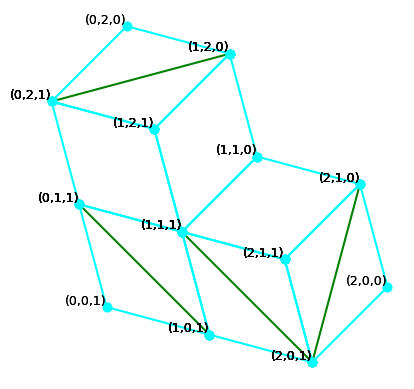

________________________________________
a00*b00


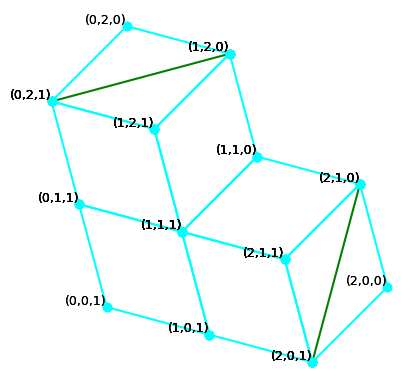

________________________________________
b00*b10*c00*c10


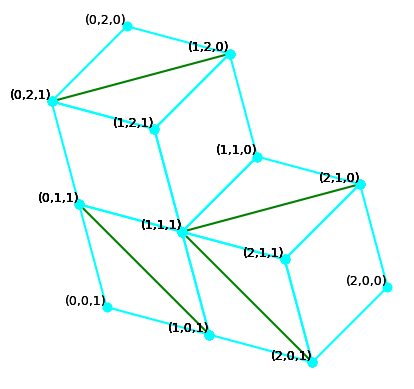

________________________________________
For the partition [[0, 0, 0], [1, 0, 0], [2, 0, 0]] we have the polynomial: 
a00*b00*b10*b20*c00*c10 + a00*b00*b10*c00*c10*c20 + a00*b00*b10*c00 + a00*b00*c00*c10 + a00*b00 + a00*c00 + b00*b10*b20*c00*c10*c20
which gives us the the monomials/groves:
a00*b00*b10*b20*c00*c10


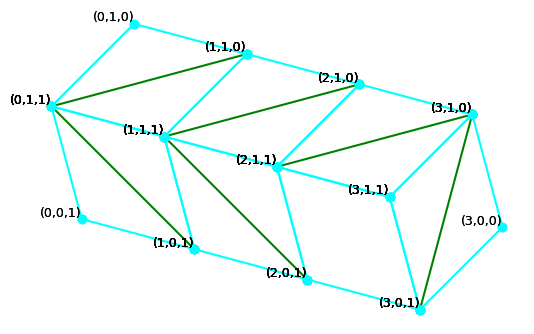

________________________________________
a00*b00*b10*c00*c10*c20


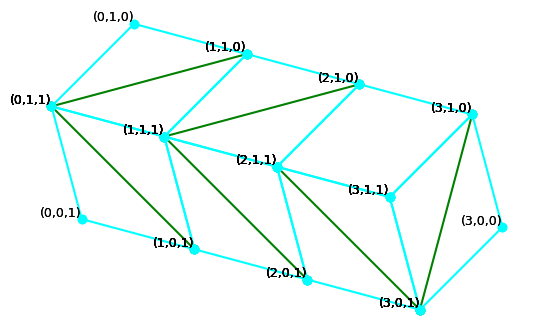

________________________________________
a00*b00*b10*c00


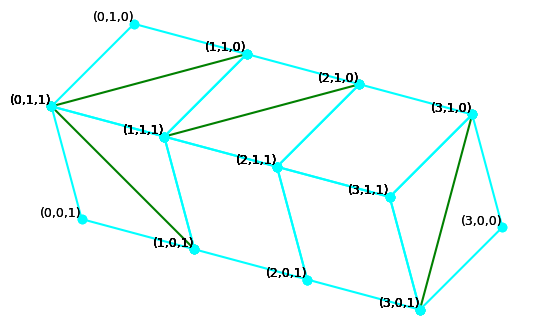

________________________________________
a00*b00*c00*c10


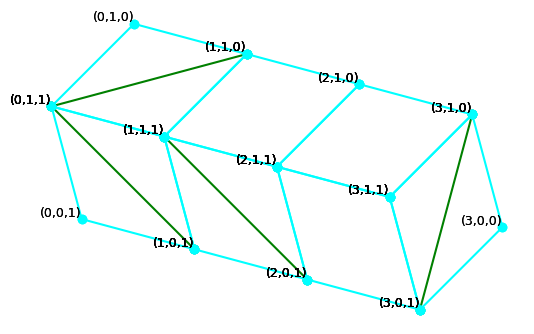

________________________________________
a00*b00


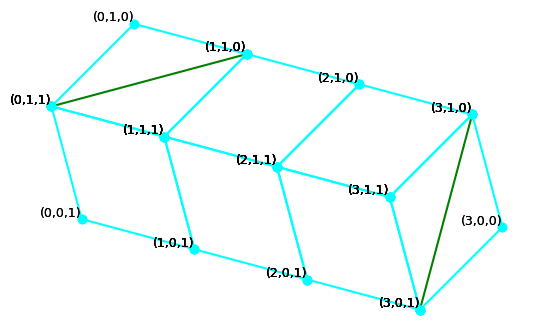

________________________________________
a00*c00


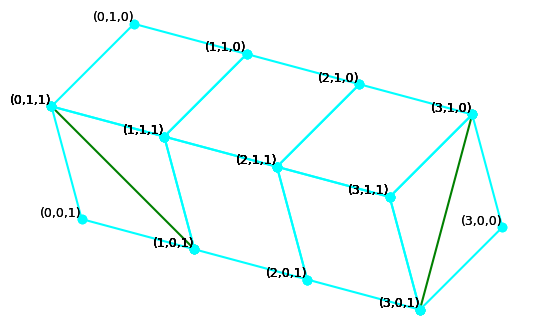

________________________________________
b00*b10*b20*c00*c10*c20


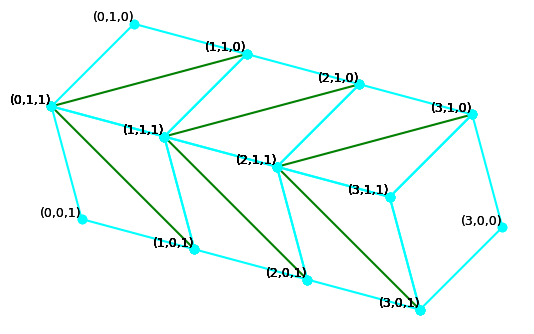

________________________________________


In [14]:
for i in range(1,len(master_pi)):
  for partition in master_pi[i]:
    print("For the partition "+str(partition)+" we have the polynomial: ")
    pile_of_monos = takes_partition_returns_list_of_monomials(partition)
    print("which gives us the the monomials/groves:")
    for j in range(len(pile_of_monos)):
      print(pile_of_monos[j])
      fig, ax = plt.subplots()
      takes_monomial_and_partition_returns_grove_image(pile_of_monos[j],partition,fig,ax)
      prints_image_of_partition(partition,fig,ax)
      # Set the aspect ratio to be equal
      ax.set_aspect('equal')
      # Remove axis and ticks
      ax.axis('off')
      plt.show()
      print("________________________________________")

